In [6]:
%pip install matplotlib pandas scipy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


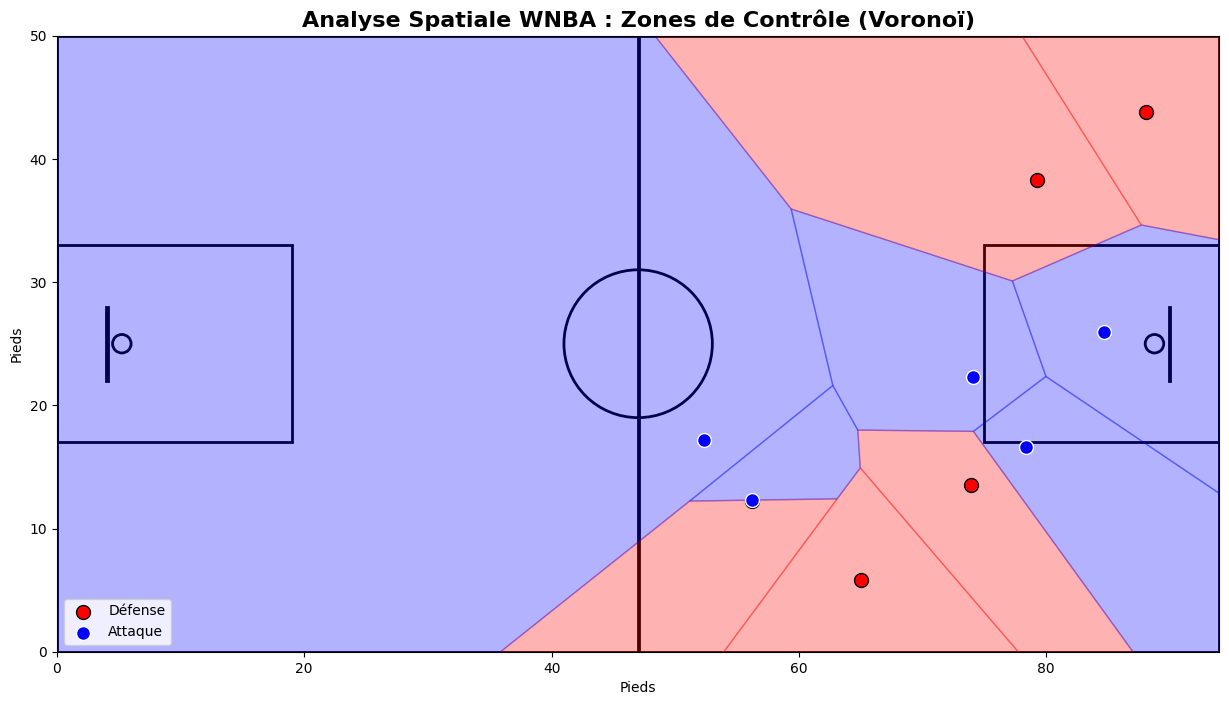

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d

# 1. Fonction pour dessiner un terrain de basket réaliste (Dimensions NBA en pieds)
def draw_court(ax=None, color='black', lw=2):
    if ax is None:
        ax = plt.gca()

    # Création du terrain (94x50 pieds)
    # Fond parquet (optionnel, ici on reste sobre pour la clarté des zones)
    court = patches.Rectangle((0, 0), 94, 50, linewidth=lw, edgecolor=color, facecolor='none', zorder=0)
    ax.add_patch(court)

    # Panier et Raquette (Gauche)
    hoop_left = patches.Circle((5.25, 25), radius=0.75, linewidth=lw, color=color, fill=False)
    backboard_left = patches.Rectangle((4, 22), 0.1, 6, linewidth=lw, color=color)
    paint_left = patches.Rectangle((0, 17), 19, 16, linewidth=lw, edgecolor=color, facecolor='none')
    
    # Panier et Raquette (Droite)
    hoop_right = patches.Circle((94-5.25, 25), radius=0.75, linewidth=lw, color=color, fill=False)
    backboard_right = patches.Rectangle((94-4.1, 22), 0.1, 6, linewidth=lw, color=color)
    paint_right = patches.Rectangle((94-19, 17), 19, 16, linewidth=lw, edgecolor=color, facecolor='none')

    # Ligne médiane et cercle central
    center_line = patches.Rectangle((47, 0), 0.1, 50, linewidth=lw, color=color)
    center_circle = patches.Circle((47, 25), radius=6, linewidth=lw, color=color, fill=False)

    # Ajout des éléments au graphique
    ax.add_patch(hoop_left)
    ax.add_patch(backboard_left)
    ax.add_patch(paint_left)
    ax.add_patch(hoop_right)
    ax.add_patch(backboard_right)
    ax.add_patch(paint_right)
    ax.add_patch(center_line)
    ax.add_patch(center_circle)

    return ax

# 2. Génération des données (Simulation)
np.random.seed(42) # Pour rendre le résultat reproductible

# On crée 10 joueurs (5 Attaquants, 5 Défenseurs)
# On les positionne aléatoirement sur le demi-terrain offensif (plus réaliste pour une action)
data = {
    'player_id': range(1, 11),
    'x': np.random.uniform(50, 90, 10), # Position X (côté droit du terrain)
    'y': np.random.uniform(5, 45, 10),  # Position Y
    'team': ['Defense'] * 5 + ['Offense'] * 5
}
df = pd.DataFrame(data)

# 3. Calcul et Visualisation des Zones de Voronoï
fig, ax = plt.subplots(figsize=(15, 8))
draw_court(ax, color='black')

# Astuce de Data Scientist : 
# Les diagrammes de Voronoï vont souvent à l'infini sur les bords.
# Pour "fermer" les zones sur le terrain, on ajoute 4 points fictifs très loin autour du terrain.
points = np.vstack([df[['x', 'y']].values, [[-100, -100], [-100, 200], [200, -100], [200, 200]]])

# Calcul de Voronoï
vor = Voronoi(points)

# Affichage des régions
# vor.point_region fait le lien entre l'index du point et l'index de la région
for i, region_index in enumerate(vor.point_region):
    if i >= 10: continue # On ignore les 4 points fictifs qu'on a ajoutés
    
    region = vor.regions[region_index]
    if not -1 in region and len(region) > 0:
        polygon = [vor.vertices[i] for i in region]
        
        # Déterminer la couleur selon l'équipe
        team = df.iloc[i]['team']
        color = 'red' if team == 'Defense' else 'blue'
        
        # Dessiner le polygone (la zone de contrôle)
        plt.fill(*zip(*polygon), color=color, alpha=0.3) 

# 4. Affichage des joueurs (points) par dessus les zones
# Défenseurs
defense = df[df['team'] == 'Defense']
ax.scatter(defense['x'], defense['y'], c='red', s=100, edgecolors='black', label='Défense', zorder=10)

# Attaquants
offense = df[df['team'] == 'Offense']
ax.scatter(offense['x'], offense['y'], c='blue', s=100, edgecolors='white', label='Attaque', zorder=10)

# Finitions esthétiques
ax.set_xlim(0, 94)
ax.set_ylim(0, 50)
ax.set_title("Analyse Spatiale WNBA : Zones de Contrôle (Voronoï)", fontsize=16, fontweight='bold')
ax.set_xlabel("Pieds")
ax.set_ylabel("Pieds")
ax.legend(loc='lower left')
plt.axis('on') # Garder les axes pour l'échelle ou mettre 'off' pour un look poster
plt.show()

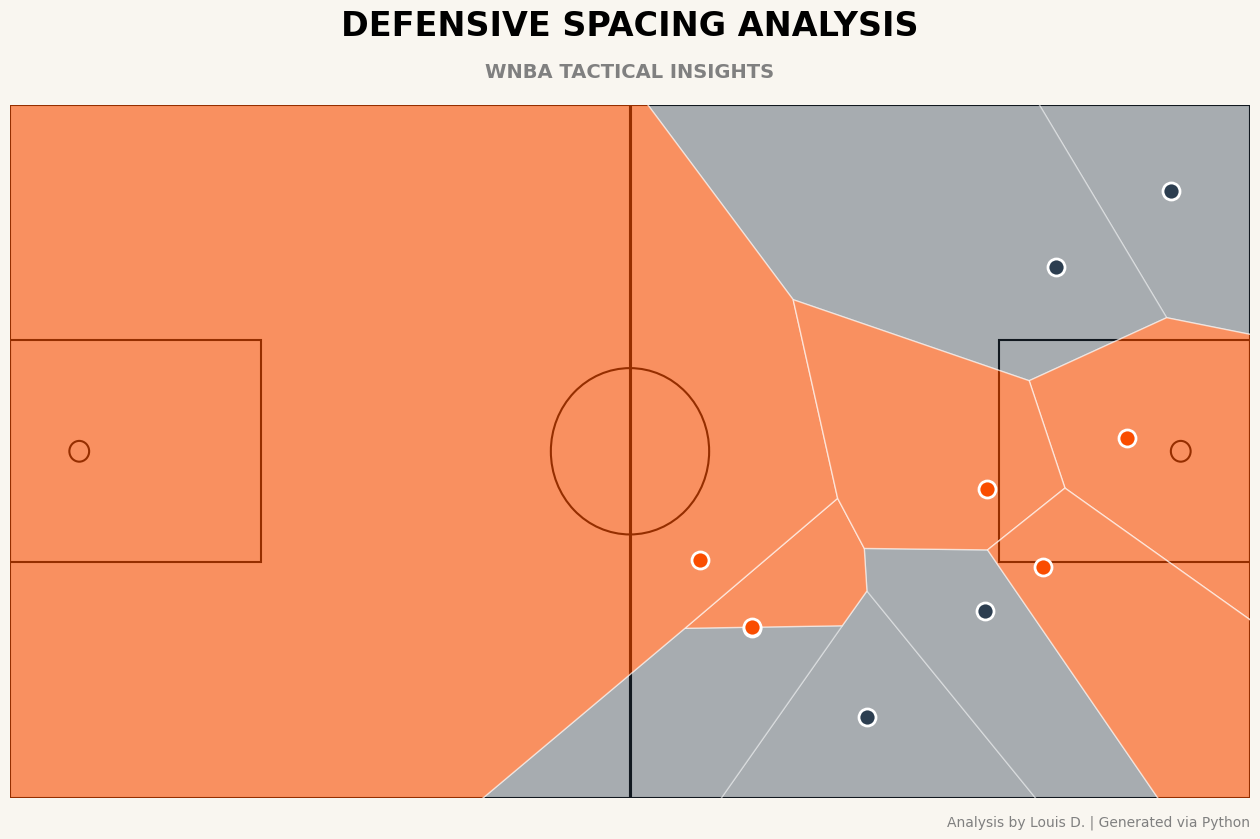

In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import numpy as np
from scipy.spatial import Voronoi

# 1. Configuration des couleurs WNBA
WNBA_ORANGE = '#FA4D00'
WNBA_BLACK = '#000000'
WNBA_BEIGE = '#F9F6F0' # Fond crème pour faire ressortir les données
DEFENSE_COLOR = '#2C3E50' # Gris bleu foncé (Sérieux)
OFFENSE_COLOR = WNBA_ORANGE # L'énergie

# 2. Fonction Terrain (Version Épurée sans cadre inutile)
def draw_court_clean(ax=None, color='black', lw=2):
    if ax is None:
        ax = plt.gca()
    # Terrain
    court = patches.Rectangle((0, 0), 94, 50, linewidth=lw, edgecolor=color, facecolor='none', zorder=0)
    ax.add_patch(court)
    # Paniers & Raquettes
    ax.add_patch(patches.Circle((5.25, 25), radius=0.75, linewidth=lw, color=color, fill=False))
    ax.add_patch(patches.Rectangle((0, 17), 19, 16, linewidth=lw, edgecolor=color, facecolor='none'))
    ax.add_patch(patches.Circle((94-5.25, 25), radius=0.75, linewidth=lw, color=color, fill=False))
    ax.add_patch(patches.Rectangle((94-19, 17), 19, 16, linewidth=lw, edgecolor=color, facecolor='none'))
    # Centre
    ax.add_patch(patches.Rectangle((47, 0), 0.1, 50, linewidth=lw, color=color))
    ax.add_patch(patches.Circle((47, 25), radius=6, linewidth=lw, color=color, fill=False))
    return ax

# 3. Génération des données (On garde ta simulation)
np.random.seed(42)
df = pd.DataFrame({
    'x': np.random.uniform(50, 90, 10),
    'y': np.random.uniform(5, 45, 10),
    'team': ['Defense'] * 5 + ['Offense'] * 5
})

# 4. Création du Graphique "Design"
fig, ax = plt.subplots(figsize=(16, 9), facecolor=WNBA_BEIGE) # Format 16:9 Cinéma
ax.set_facecolor(WNBA_BEIGE)
draw_court_clean(ax, color=WNBA_BLACK, lw=1.5)

# Calcul Voronoï
points = np.vstack([df[['x', 'y']].values, [[-100, -100], [-100, 200], [200, -100], [200, 200]]])
vor = Voronoi(points)

for i, region_index in enumerate(vor.point_region):
    if i >= 10: continue
    region = vor.regions[region_index]
    if not -1 in region and len(region) > 0:
        polygon = [vor.vertices[i] for i in region]
        # Couleurs plus modernes
        team = df.iloc[i]['team']
        # On met l'attaque en Orange translucide et la défense en Gris solide
        fill_color = OFFENSE_COLOR if team == 'Offense' else DEFENSE_COLOR
        alpha_val = 0.6 if team == 'Offense' else 0.4
        plt.fill(*zip(*polygon), color=fill_color, alpha=alpha_val, edgecolor='white', linewidth=1)

# Joueurs (Points minimalistes)
def_p = df[df['team'] == 'Defense']
off_p = df[df['team'] == 'Offense']
ax.scatter(def_p['x'], def_p['y'], c=DEFENSE_COLOR, s=150, edgecolors='white', linewidth=2, zorder=10)
ax.scatter(off_p['x'], off_p['y'], c=OFFENSE_COLOR, s=150, edgecolors='white', linewidth=2, zorder=10)

# Titres et Esthétique
ax.set_xlim(0, 94)
ax.set_ylim(0, 50)
plt.axis('off') # Supprime les axes moches !

# Ajout de texte "Storytelling" directement sur l'image
plt.text(47, 52, "WNBA TACTICAL INSIGHTS", fontsize=14, color='grey', ha='center', fontweight='bold', fontfamily='sans-serif')
plt.text(47, 55, "DEFENSIVE SPACING ANALYSIS", fontsize=24, color='black', ha='center', fontweight='bold', fontfamily='sans-serif')

# Signature (Ton nom en bas)
plt.text(94, -2, "Analysis by Louis D. | Generated via Python", fontsize=10, color='grey', ha='right')

# Sauvegarde
plt.savefig('WNBA_Ghost_Defense.png', dpi=300, bbox_inches='tight', facecolor=WNBA_BEIGE)
plt.show()

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import numpy as np
from scipy.spatial import Voronoi
from matplotlib.animation import FuncAnimation, PillowWriter

# --- 1. CONFIGURATION ESTHÉTIQUE ---
WNBA_ORANGE = '#FA4D00'
WNBA_BLACK = '#000000'
WNBA_BEIGE = '#F9F6F0'
DEFENSE_COLOR = '#2C3E50'
OFFENSE_COLOR = WNBA_ORANGE

# --- 2. FONCTION TERRAIN (La même que V2) ---
def draw_court_clean(ax=None, color='black', lw=2):
    if ax is None: ax = plt.gca()
    court = patches.Rectangle((0, 0), 94, 50, linewidth=lw, edgecolor=color, facecolor='none', zorder=0)
    ax.add_patch(court)
    ax.add_patch(patches.Circle((5.25, 25), radius=0.75, linewidth=lw, color=color, fill=False))
    ax.add_patch(patches.Rectangle((0, 17), 19, 16, linewidth=lw, edgecolor=color, facecolor='none'))
    ax.add_patch(patches.Circle((94-5.25, 25), radius=0.75, linewidth=lw, color=color, fill=False))
    ax.add_patch(patches.Rectangle((94-19, 17), 19, 16, linewidth=lw, edgecolor=color, facecolor='none'))
    ax.add_patch(patches.Rectangle((47, 0), 0.1, 50, linewidth=lw, color=color))
    ax.add_patch(patches.Circle((47, 25), radius=6, linewidth=lw, color=color, fill=False))
    return ax

# --- 3. GÉNÉRATION DE MOUVEMENT (Interpolation) ---
# On simule un déplacement fluide sur 60 frames (images)
np.random.seed(42)
frames = 60
num_players = 10

# Position de départ (aléatoire)
start_x = np.random.uniform(50, 90, num_players)
start_y = np.random.uniform(5, 45, num_players)

# Position d'arrivée (aléatoire, mais différente)
end_x = np.random.uniform(40, 94, num_players) # Ils bougent vers le panier
end_y = np.random.uniform(0, 50, num_players)

# On crée les trajectoires (interpolation linéaire)
# trajectories_x sera un tableau de taille (60, 10)
trajectories_x = np.linspace(start_x, end_x, frames)
trajectories_y = np.linspace(start_y, end_y, frames)

# Équipes (5 Def, 5 Off)
teams = ['Defense'] * 5 + ['Offense'] * 5

# --- 4. FONCTION D'ANIMATION ---
fig, ax = plt.subplots(figsize=(12, 7), facecolor=WNBA_BEIGE)

def update(frame):
    ax.clear() # On efface l'image précédente
    ax.set_facecolor(WNBA_BEIGE)
    draw_court_clean(ax, color=WNBA_BLACK, lw=1.5)
    
    # Récupérer les positions à l'instant T (frame)
    current_x = trajectories_x[frame]
    current_y = trajectories_y[frame]
    
    # Calcul Voronoï
    # On ajoute les 4 points infinis pour fermer les polygones
    points = np.column_stack((current_x, current_y))
    points_vor = np.vstack([points, [[-100, -100], [-100, 200], [200, -100], [200, 200]]])
    
    vor = Voronoi(points_vor)
    
    # Dessiner les zones
    for i, region_index in enumerate(vor.point_region):
        if i >= num_players: continue # Ignorer les points infinis
        
        region = vor.regions[region_index]
        if not -1 in region and len(region) > 0:
            polygon = [vor.vertices[v] for v in region]
            
            # Couleur dynamique
            team = teams[i]
            fill_color = OFFENSE_COLOR if team == 'Offense' else DEFENSE_COLOR
            alpha_val = 0.5 if team == 'Offense' else 0.3
            
            ax.fill(*zip(*polygon), color=fill_color, alpha=alpha_val, edgecolor='white', linewidth=1)
            
    # Dessiner les joueurs
    for i in range(num_players):
        c = DEFENSE_COLOR if teams[i] == 'Defense' else OFFENSE_COLOR
        ax.scatter(current_x[i], current_y[i], c=c, s=150, edgecolors='white', linewidth=2, zorder=10)

    # Esthétique
    ax.set_xlim(0, 94)
    ax.set_ylim(0, 50)
    plt.axis('off')
    ax.set_title(f"WNBA Dynamic Space Control - Frame {frame}/{frames}", fontsize=15, fontweight='bold', color='black')

# --- 5. CRÉATION ET SAUVEGARDE ---
print("Génération de l'animation en cours... (Cela peut prendre 15-20 secondes)")
ani = FuncAnimation(fig, update, frames=frames, interval=100) # interval=100ms entre chaque frame

# Sauvegarde en GIF
writer = PillowWriter(fps=15)
ani.save("wnba_ghost_defense.gif", writer=writer)

print("Terminé ! Ouvre le fichier 'wnba_ghost_defense.gif' dans ton dossier.")
plt.close() # Empêche l'affichage statique dans le notebook pour économiser la mémoire

Génération de l'animation en cours... (Cela peut prendre 15-20 secondes)
Terminé ! Ouvre le fichier 'wnba_ghost_defense.gif' dans ton dossier.
